In [1]:
%matplotlib notebook
import os
import pandas as pd
import seaborn as sns
from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import PandasTools
import numpy as np
from rdkit.Chem import rdFMCS
from rdkit.Chem import AllChem
from ipywidgets import interact
from tqdm.notebook import tqdm
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from pylab import rcParams

In [2]:
data_df = pd.read_csv("Phenylimidazoles.csv", sep=" ")
data_df

,CMPD_CHEMBLID,SMILES,PIC50_VALUE,REFERENCE,CLASE,ID_CLASE
0,CHEMBL3353090,COc1cc(Nc2nc(nn2C)-c2ccc(c(OC)c2)-n2cnc(C)c2)c...,8.30,Velter2014,f-triazoles,17
1,CHEMBL3771056,CNc1nc(Nc2ccc(c(OC)c2)-n2cnc(Cl)c2)nc2c1C=CCN=...,8.30,Wu2016,f-otros,28
2,COMPOUND000K3,COc4cc(C)c(Nc3nc(c2ccc(n1cnc(C)c1)c(F)c2)cs3)c...,8.30,Kounnas2010,f-tiazoles,21
3,CHEMBL3580774,C[C@@H](COc1ccc(F)cc1[C@@H](C)C(F)(F)F)N1CCn2c...,8.22,Pettersson2015b,f-piridopirazinediona,22
4,CHEMBL3394946,C[C@H](N1CCn2c(ccc(-n3cnc(C)c3)c2=O)C1=O)c1cn(...,8.22,Pettersson2015a,f-piridopirazinediona,22
...,...,...,...,...,...,...
335,COMPOUNDP015,COc3cc2c(=O)n(CCc1cccc(Cl)c1)ccc2cc3n4cnc(C)c4,4.80,Pettersson2014,f-piridopirazinediona,22
336,COMPOUNDP25B,COc3c(n1cnc(C)c1)ccc4c(=O)n(CCc2cccc(Cl)c2)ccc34,5.47,Pettersson2014,f-piridopirazinediona,22
337,COMPOUNDP027,Cc4cn(c3ccc2c(=O)n(Cc1cccc(C(F)(F)F)c1)ccc2c3O...,6.04,Pettersson2014,f-piridopirazinediona,22
338,COMPOUNDP028,Cc4cn(c3ccc2C(=O)N(Cc1cccc(C(F)(F)F)c1)CCc2c3O...,6.40,Pettersson2014,f-piridopirazinediona,22


In [3]:
#Mostrar los compuestos con SMILES duplicados
duplicateRowsDF = data_df[data_df.duplicated(['SMILES'],keep=False)]
print(duplicateRowsDF)

#quitar smiles duplicados en la base de datos
before_rows = data_df.shape[0]
data_df.drop_duplicates("SMILES",inplace=True)
after_rows = data_df.shape[0]
print(f"{before_rows} rows reduced to {after_rows} rows")
#data_df.to_csv('fei.csv', sep='\t', header=True)


Empty DataFrame
Columns: [CMPD_CHEMBLID, SMILES, PIC50_VALUE, REFERENCE, CLASE, ID_CLASE]
Index: []
340 rows reduced to 340 rows


In [5]:
#MAYACHEMTOOLS_DIR="/Users/angel/anaconda2/mayachemtools"

#script_path = os.path.join(MAYACHEMTOOLS_DIR,
                #"bin/MACCSKeysFingerprints.pl")

#command = ("perl " + script_path + " -size 322 -r SampleMACCS322FPCount feimza.sdf")
#command = ("perl " + script_path + " -r feimza_EIF -o feimza.sdf -e FixedSize")
#os.system(command)

#Leer el csv del fingerprint a usar
cosa1 = pd.read_csv('ESI.csv',sep=',')
cosa1.columns = ['CompoundID','FingerPrint']
cosa2 = cosa1.FingerPrint.str.split(expand=True,)
cosa2.drop(columns=0,inplace=True)

tmp = np.array(cosa2,dtype=float)

#correr el tsne

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=3000)

tsne_results = tsne.fit_transform(tmp)

tsne_data = pd.DataFrame()
tsne_data['xtsne'] = tsne_results[:,0]
tsne_data['ytsne'] = tsne_results[:,1]
tsne_data['ztsne'] = tsne_results[:,2]

tsne_data.to_csv('tsne_GIsGMsdata3d_3.csv', sep='\t', header=True)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 340 samples in 0.218s...
[t-SNE] Computed neighbors for 340 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 340 / 340
[t-SNE] Mean sigma: 8.727367
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.684937
[t-SNE] KL divergence after 3000 iterations: 1.327368


In [6]:
tsne_data = pd.read_csv("tsne_GIsGMsdata3d_3.csv", sep='\t')
tsne_data

,Unnamed: 0,xtsne,ytsne,ztsne
0,0,-242.529130,-11.242499,-4.331955
1,1,59.975357,-150.267870,247.519260
2,2,59.041520,-153.501920,-24.042538
3,3,84.362830,72.129036,-301.255830
4,4,30.851692,216.703950,-77.524570
...,...,...,...,...
335,335,-50.096622,16.275808,246.405120
336,336,13.735544,-236.021270,-15.919462
337,337,153.821080,298.257660,-9.357789
338,338,117.278880,285.635250,8.634395


<IPython.core.display.Javascript object>


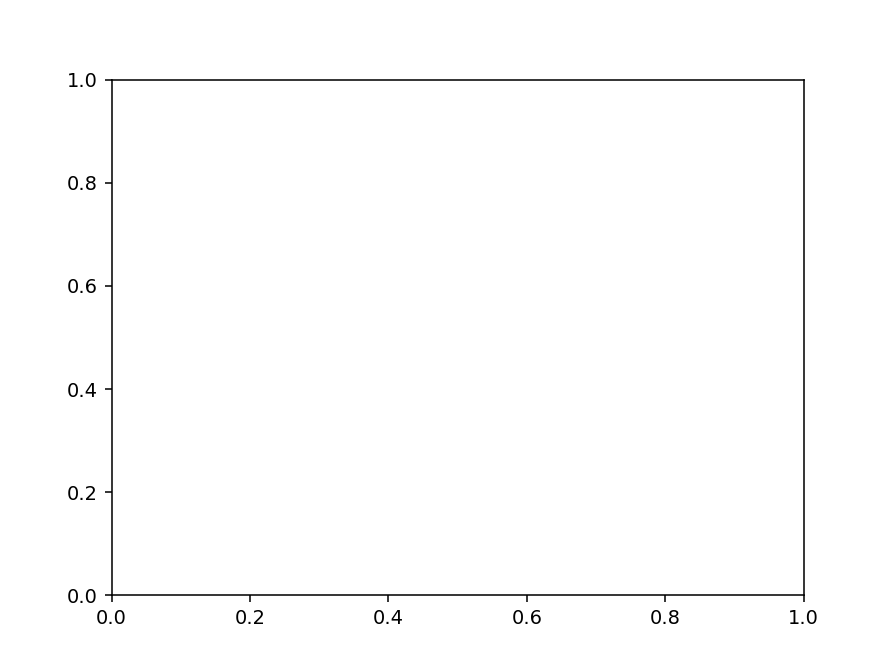

NameError: name 'data_class' is not defined

In [7]:
#graficar el tsne 2d usando los grupos del Knn o clase de los compuestos

fig, ax = plt.subplots()

tsne_data['xtsne'] = [x for x in tsne_data['xtsne']]
tsne_data['ytsne'] = [x for x in tsne_data['ytsne']]
data_class['ID_CLASE'] = [x for x in data_class['ID_CLASE']]

plt.xlabel(r'xtsne', fontsize=15)
plt.ylabel(r'ytsne', fontsize=15)

#g=sns.scatterplot(x=tsne_data['xtsne'],y=tsne_data['ytsne'], s=100,hue=data_hc['Groups'],palette='deep')
#g=sns.scatterplot(x=tsne_data['xtsne'],y=tsne_data['ytsne'], s=100,hue=data_class['ID_CLASE'],palette='deep')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sc=plt.scatter(tsne_data['xtsne'],tsne_data['ytsne'],s=50, c=data_class['ID_CLASE'], cmap='Paired')
cbar=plt.colorbar(sc)
cbar.set_label('Grupos', labelpad=20, rotation=270, size=12)


#plt.savefig('tsne_feimza_2d_clases_feimpart.png', format='png', bbox_inches="tight", dpi=600)

In [ ]:
#graficar el tsne 2d 

fig, ax = plt.subplots()

tsne_data['xtsne'] = [x for x in tsne_data['xtsne']]
tsne_data['ytsne'] = [x for x in tsne_data['ytsne']]
data_df['pIC50'] = [x for x in data_df['PIC50_VALUE']]

plt.xlabel(r'xtsne', fontsize=15)
plt.ylabel(r'ytsne', fontsize=15)

sc=plt.scatter(tsne_data['xtsne'],tsne_data['ytsne'],s=50, c=data_df['pIC50'], cmap='jet')
cbar=plt.colorbar(sc)
cbar.set_label('pIC50', labelpad=20, rotation=270, size=12)

#n=list(range(1, 765))
#for i, txt in enumerate(n):
    #ax.annotate(txt, (tsne_data['xtsne'][i], tsne_data['ytsne'][i]), fontsize=1)

#plt.show()
plt.savefig('tsne_feimza_2d.png', format='png', bbox_inches="tight", dpi=600)

In [ ]:
tsne_data = pd.read_csv("tsne_GIsGMsdata3d.csv", sep='\t')
tsne_data

In [ ]:
#graficar el tsne 3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

tsne_data['xtsne'] = [x for x in tsne_data['xtsne']]
tsne_data['ytsne'] = [x for x in tsne_data['ytsne']]
tsne_data['ztsne'] = [x for x in tsne_data['ztsne']]
#data_df['pIC50'] = [x for x in data_df['PIC50_VALUE']]

sc=ax.scatter(tsne_data['xtsne'],tsne_data['ytsne'],tsne_data['ztsne'], c=data_class['ID_CLASE'], cmap='tab20')
#sc=ax.scatter(tsne_data['xtsne'],tsne_data['ytsne'],tsne_data['ztsne'], c=data_df['pIC50'], cmap='jet')
cbar=plt.colorbar(sc)
cbar.set_label('color', labelpad=20, rotation=270, size=12)

ax.set_xlabel('xtsne', fontsize=15)
ax.set_ylabel('ytsne', fontsize=15)
ax.set_zlabel('ztsne', fontsize=15)


plt.show()
#plt.savefig('tsne_GIsGMs_3d_clases.png', format='png', bbox_inches="tight", dpi=600)